# Project 1: Data Story with Philosophy data

Project 1: Analysis Code

In [33]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.patches as mpatches
from nrclex import NRCLex
import numpy as np
from tabulate import tabulate

In [2]:
# Loading the data

phil_data_raw = pd.read_csv(r'C:\Users\aakan\Downloads\philosophy_data1.csv')

In [3]:
# Q1 Timeline of school of philosophy Dataset

Q1_data = phil_data_raw[['school']].groupby(['school']).max()
Q1_data['min_pub'] = phil_data_raw[['school','original_publication_date']].groupby(['school']).min()
Q1_data['max_pub'] = phil_data_raw[['school','original_publication_date']].groupby(['school']).max()
Q1_data['lim_pub'] = Q1_data['max_pub'] - Q1_data['min_pub']

Q1_data.loc[Q1_data['lim_pub'] == 0, 'lim_pub'] = 2
Q1_data.reset_index(inplace=True)
Q1_data.sort_values(by=['min_pub'], inplace = True)

Q1_data_pos = Q1_data.loc[Q1_data['max_pub'] > 200]
Q1_data_neg = Q1_data.loc[Q1_data['max_pub'] < 200]

<ipython-input-5-409c7a613fef>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Q1_data_pos['school'], rotation=90)
<ipython-input-5-409c7a613fef>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Q1_data_neg['school'], rotation=90)


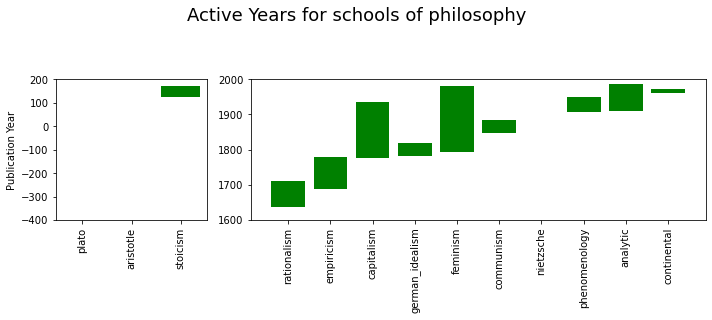

In [5]:
fig, (ax2, ax1) = plt.subplots(1, 2, sharex=False, sharey=False , gridspec_kw={'width_ratios': [1, 3]})
fig.subplots_adjust(hspace=0.05)

ax1.bar(Q1_data_pos['school'], Q1_data_pos['lim_pub'], bottom = Q1_data_pos['min_pub'], color = 'green')
ax2.bar(Q1_data_neg['school'], Q1_data_neg['lim_pub'], bottom = Q1_data_neg['min_pub'], color = 'green')

ax1.set_ylim(1600, 2000)  
ax2.set_ylim(-400, 200)

fig.tight_layout(pad=0.0)
ax1.set_xticklabels(Q1_data_pos['school'], rotation=90)
ax2.set_xticklabels(Q1_data_neg['school'], rotation=90)

fig.suptitle('Active Years for schools of philosophy', fontsize=18.0, y = 1.1)
ax2.set_ylabel('Publication Year')
fig.set_figwidth(10)

plt.tight_layout()
plt.savefig(r'C:\Users\aakan\OneDrive\Documents\Spring 2022\Applied Data Science\GitHub\spring-2022-prj1-aa4863\figs\section1.png', dpi=fig.dpi)
plt.show()

In [6]:
# Q2 School of thought overlap

schools = set(phil_data_raw['school'])
schools_words = {}

for school in schools:
    schools_words[school] = ' '.join(phil_data_raw[phil_data_raw['school'] == school]['lemmatized_str'].tolist())

In [7]:
# with column 'lemmatized_str'

corpus = []
schools = []
for school in schools_words:
    schools.append(school)
    corpus.append(schools_words[school])
    
my_stop_words = text.ENGLISH_STOP_WORDS.union(["pron"])

vectorizer = TfidfVectorizer(stop_words = my_stop_words)
vecs = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

clouds_dict1 = {}

for i in range(len(df)):
    Cloud = WordCloud(background_color = "white", max_words = 50).generate_from_frequencies(df.iloc[i])
    clouds_dict1[schools[i]] = Cloud

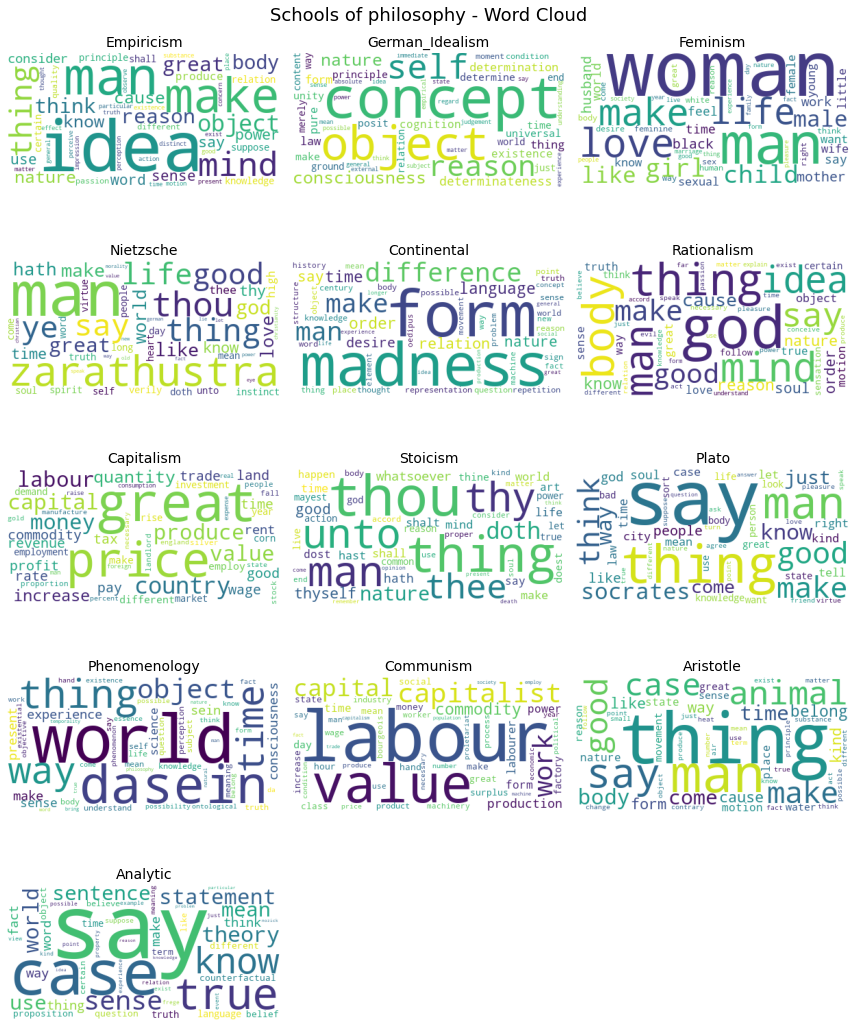

In [8]:
fig, axes = plt.subplots(5, 3, sharex=False, sharey=False)

fig.delaxes(axes[4,1])
fig.delaxes(axes[4,2])

for i in range(len(schools)):
    x = i // 3
    y = i % 3
    axes[x,y].imshow(clouds_dict1[schools[i]])
    axes[x,y].set_axis_off()
    axes[x,y].set_title(schools[i].title(), fontsize=14.0)
    
fig.tight_layout(pad=0.5)
fig.suptitle('Schools of philosophy - Word Cloud', fontsize=18.0, y = 0.97)
fig.set_figwidth(12)
fig.set_figheight(15)
plt.tight_layout()
plt.savefig(r'C:\Users\aakan\OneDrive\Documents\Spring 2022\Applied Data Science\GitHub\spring-2022-prj1-aa4863\figs\section2.png', dpi=fig.dpi)
plt.show()

In [9]:
#Q3 Overlap

top_words = {}

for school in schools:
    top_words[school] = list(clouds_dict1[school].words_.keys())

common_words = pd.DataFrame({'School_A':[],'School_B':[],'Common_words':[],'Common_word_count':[]})

for i in range(len(schools)):
    for j in range(i+1, len(schools)):
        common_words = common_words.append({'School_A': schools[i],
                                            'School_B': schools[j],
                                            'Common_words': sorted(set(top_words[schools[i]])&set(top_words[schools[j]]), key = lambda k : top_words[schools[i]].index(k)),
                                            'Common_word_count': len(sorted(set(top_words[schools[i]])&set(top_words[schools[j]]), key = lambda k : top_words[schools[i]].index(k)))}, 
                                           ignore_index = True)

common_words.sort_values(by = 'Common_word_count', ascending = False, inplace = True)


In [29]:
overlap = common_words[0:5][['School_A','School_B','Common_word_count']].reset_index()
overlap = overlap.drop('index',1)

print(tabulate(overlap, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤═════════════╤═════════════╤═════════════════════╕
│    │ School_A    │ School_B    │   Common_word_count │
╞════╪═════════════╪═════════════╪═════════════════════╡
│  0 │ empiricism  │ rationalism │                  29 │
├────┼─────────────┼─────────────┼─────────────────────┤
│  1 │ rationalism │ aristotle   │                  27 │
├────┼─────────────┼─────────────┼─────────────────────┤
│  2 │ empiricism  │ aristotle   │                  24 │
├────┼─────────────┼─────────────┼─────────────────────┤
│  3 │ aristotle   │ analytic    │                  23 │
├────┼─────────────┼─────────────┼─────────────────────┤
│  4 │ plato       │ aristotle   │                  23 │
╘════╧═════════════╧═════════════╧═════════════════════╛


<Figure size 432x288 with 0 Axes>

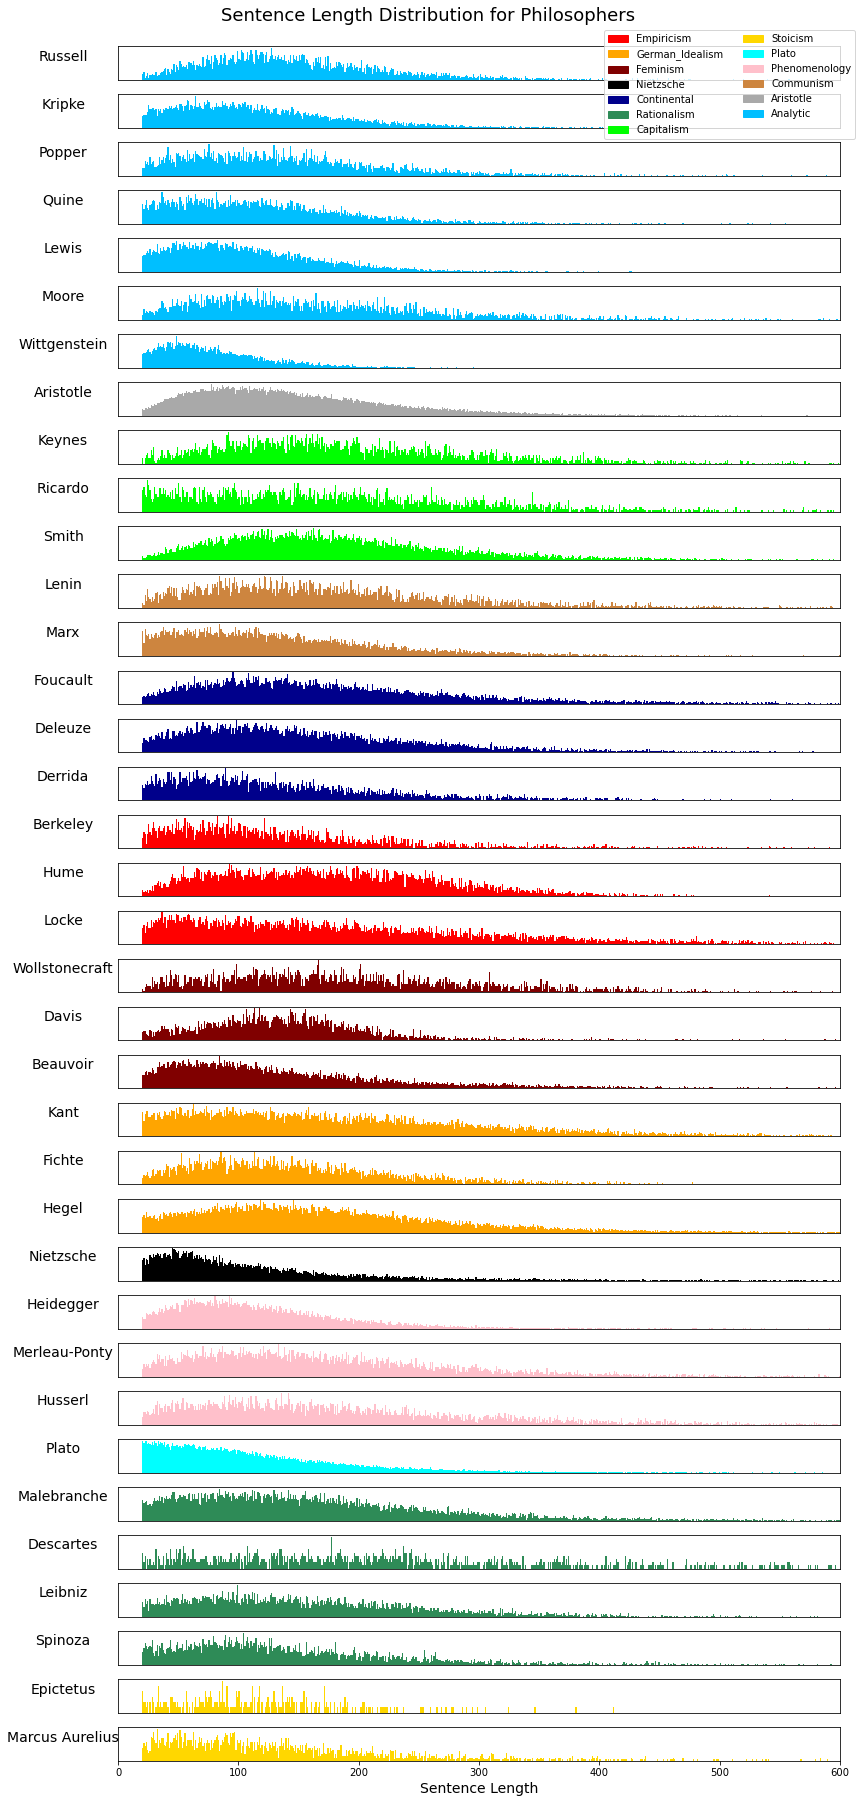

In [37]:
# Q4 : Writing style of different pholisophers
# Part A : Sentence Length

colors = ['red', 'orange', 'maroon', 'black', 'darkblue', 'seagreen', 'lime', 'gold', 'cyan', 'pink', 'peru', 'darkgrey', 'deepskyblue']

school_color = {}

for i in range(len(colors)):
    school_color[schools[i]] = colors[i]

legend_col = []

for i in range(len(colors)):
    x = mpatches.Patch(color = colors[i] , label=schools[i].title())
    legend_col.append(x)

school_author = phil_data_raw[['school','author']].drop_duplicates().sort_values(by = 'school').reset_index()

word_len_dict = {}

for author in school_author['author']:
    word_len_dict[author] = phil_data_raw[phil_data_raw['author'] == author]['sentence_length'].tolist()

fig, axes = plt.subplots(36, 1, sharex=False, sharey=False)

for i in range(len(school_author)):
    axes[i].hist(word_len_dict[school_author['author'][i]], bins=range(min(word_len_dict[school_author['author'][i]]), max(word_len_dict[school_author['author'][i]]) + 1, 1), 
              alpha=1.0, color=school_color[school_author['school'][i]])
    axes[i].axes.yaxis.set_ticks([])
    if i<len(school_author)-1:
        axes[i].axes.xaxis.set_ticks([])
    
    axes[i].set_xlim(0,600)
    axes[i].set_ylabel(school_author['author'][i].title(), fontsize=14.0, labelpad = 55.0, rotation = 0)  
    
axes[35].set_xlabel('Sentence Length', fontsize=14.0)
fig.suptitle('Sentence Length Distribution for Philosophers', fontsize=18.0, y = 1.0)
fig.set_figwidth(12)
fig.set_figheight(25)
fig.legend(handles = legend_col, loc = 'upper right', ncol = 2, bbox_to_anchor=(1.0, 0.99))
plt.tight_layout()
plt.savefig(r'C:\Users\aakan\OneDrive\Documents\Spring 2022\Applied Data Science\GitHub\spring-2022-prj1-aa4863\figs\section4a.png', dpi=fig.dpi)
plt.show()

In [31]:
# Part B: Sentiment and Emotion Analysis for Philosophers

authors = list(set(phil_data_raw['author']))
authors_words = {}

for author in authors:
    authors_words[author] = ' '.join(phil_data_raw[phil_data_raw['author'] == author]['sentence_lowered'].tolist())
    
senti_ratio = []

for author in authors_words:
    text_object = NRCLex(text = authors_words[author])
    freq = text_object.affect_frequencies
    freq['author'] = author
    senti_ratio.append(freq)
    
senti_ratio = pd.DataFrame(senti_ratio)
senti_ratio = senti_ratio[['sadness', 'fear', 'joy', 'anger', 'disgust', 'trust', 'anticipation', 'surprise', 'positive', 'negative', 'author']]

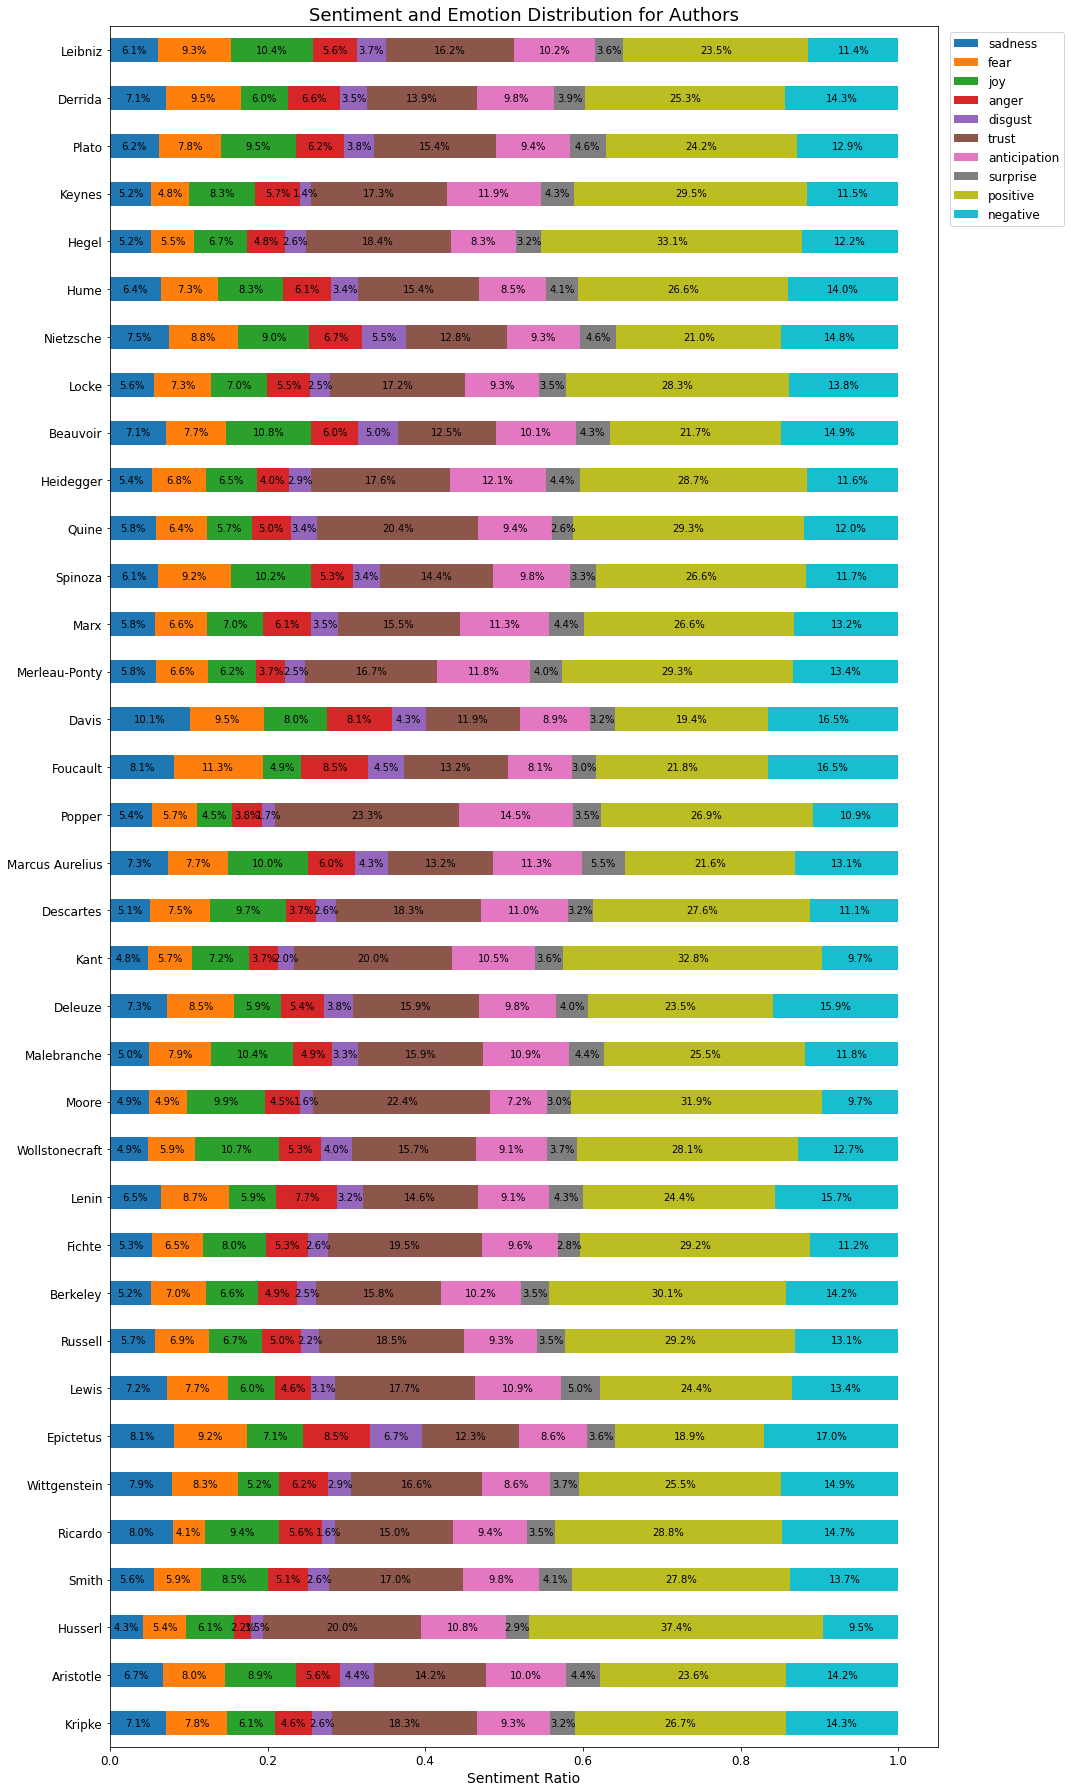

In [32]:
senti_ratio.plot(
    x = 'author',
    kind = 'barh',
    stacked = True,
    title = 'Sentiment and Emotion Distribution for Authors',
    fontsize = 12.0,
    mark_right = True,
    figsize = (15,25),
    sort_columns = True)

df_total = senti_ratio.sum(numeric_only = True, axis = 1)
df_rel = senti_ratio[senti_ratio.columns[:-1]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(senti_ratio.iloc[:, :-1].cumsum(1)[n], senti_ratio[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', va = 'center', ha = 'center')
        
plt.xlabel('Sentiment Ratio', fontsize=14.0)
plt.ylabel('', fontsize=0.0)
plt.title('Sentiment and Emotion Distribution for Authors', fontsize = 18.0)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.16, 1.0), fontsize = 12.0)
plt.tight_layout()
plt.savefig(r'C:\Users\aakan\OneDrive\Documents\Spring 2022\Applied Data Science\GitHub\spring-2022-prj1-aa4863\figs\section4b.png', dpi=fig.dpi)
plt.show()